In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample data: texts and labels (1 = spam, 0 = ham)
texts = [
    "Congratulations! You've won a free ticket.",
    "Call me when you get a chance.",
    "You have been selected for a prize!",
    "Are we meeting tomorrow?",
    "Free entry in a weekly competition!",
    "Can you send me the report?",
    "Win a brand new car, click here!",
    "Lunch at 1 pm?",
]
labels = [1, 0, 1, 0, 1, 0, 1, 0]




In [6]:
# Stratified split to keep spam/ham balance in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.25, random_state=42, stratify=labels)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



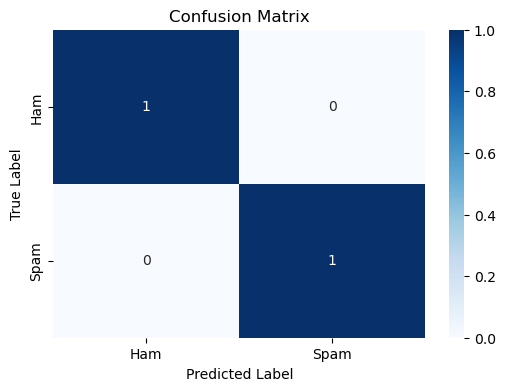

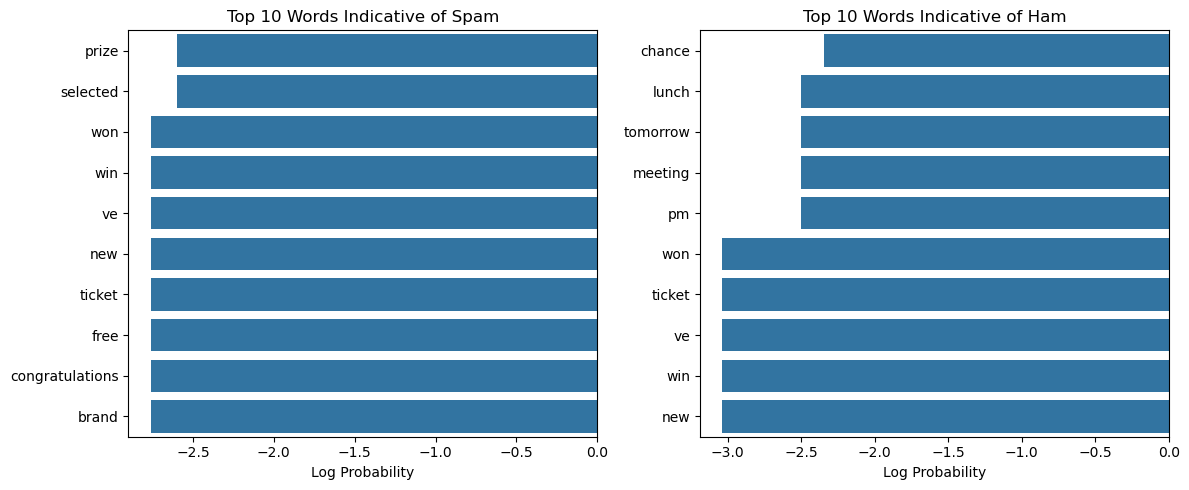

In [7]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature importance: Top words per class
feature_names = vectorizer.get_feature_names_out()

spam_log_prob = clf.feature_log_prob_[1]
ham_log_prob = clf.feature_log_prob_[0]

n = 10  # number of top features to show

top_spam_indices = spam_log_prob.argsort()[-n:][::-1]
top_ham_indices = ham_log_prob.argsort()[-n:][::-1]

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(x=spam_log_prob[top_spam_indices], y=feature_names[top_spam_indices])
plt.title('Top 10 Words Indicative of Spam')
plt.xlabel('Log Probability')

plt.subplot(1, 2, 2)
sns.barplot(x=ham_log_prob[top_ham_indices], y=feature_names[top_ham_indices])
plt.title('Top 10 Words Indicative of Ham')
plt.xlabel('Log Probability')

plt.tight_layout()
plt.show()



In [8]:
# Function for predicting new text
def predict_spam(text):
    vect_text = vectorizer.transform([text])
    prediction = clf.predict(vect_text)
    return "Spam" if prediction[0] == 1 else "Ham"

# Test predictions
print(predict_spam("Congratulations, you've won a lottery!"))
print(predict_spam("Hey, are you coming to the meeting?"))

Spam
Ham
